In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

print ("done")

done


In [ ]:
df = pd.read_csv('NFLX.csv')

df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300
6,2015-12-24,118.220001,118.800003,117.300003,117.330002,117.330002,3531300
7,2015-12-28,117.260002,117.349998,113.849998,117.110001,117.110001,8424300
8,2015-12-29,118.190002,119.599998,116.919998,119.120003,119.120003,8159200
9,2015-12-30,118.949997,119.019997,116.430000,116.709999,116.709999,8149700


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,226.708094,229.972979,223.105690,226.670159,226.670159,9.730586e+06
std,103.305422,104.851349,101.458611,103.203785,103.203785,6.398967e+06
min,80.570000,84.699997,79.949997,82.790001,82.790001,1.616300e+06
25%,125.779999,127.165001,124.355000,125.514999,125.514999,5.573200e+06
50%,197.850006,199.440002,195.330002,198.000000,198.000000,7.857600e+06
75%,325.529999,330.835006,318.869995,325.220001,325.220001,1.178630e+07
max,421.380005,423.209991,413.079987,418.970001,418.970001,5.841040e+07


In [ ]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1007,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
unique,1007,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-12-16,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,226.708094,229.972979,223.105690,226.670159,226.670159,9.730586e+06
std,NaN,103.305422,104.851349,101.458611,103.203785,103.203785,6.398967e+06
min,NaN,80.570000,84.699997,79.949997,82.790001,82.790001,1.616300e+06
25%,NaN,125.779999,127.165001,124.355000,125.514999,125.514999,5.573200e+06
50%,NaN,197.850006,199.440002,195.330002,198.000000,198.000000,7.857600e+06
75%,NaN,325.529999,330.835006,318.869995,325.220001,325.220001,1.178630e+07


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999489,0.999333,0.998712,0.998712,-0.095059
High,0.999489,1.000000,0.999264,0.999438,0.999438,-0.084998
Low,0.999333,0.999264,1.000000,0.999448,0.999448,-0.107404
Close,0.998712,0.999438,0.999448,1.000000,1.000000,-0.095180
Adj Close,0.998712,0.999438,0.999448,1.000000,1.000000,-0.095180
Volume,-0.095059,-0.084998,-0.107404,-0.095180,-0.095180,1.000000


In [ ]:
nflx_df=df[["Date","High","Open","Low","Close"]]
nflx_df.head(10)


,Date,High,Open,Low,Close
0,2015-12-16,123.000000,119.800003,118.089996,122.639999
1,2015-12-17,126.349998,123.970001,122.419998,122.510002
2,2015-12-18,122.190002,120.849998,117.919998,118.019997
3,2015-12-21,119.589996,119.510002,115.660004,116.629997
4,2015-12-22,117.430000,117.300003,114.860001,116.239998
5,2015-12-23,118.559998,116.910004,115.779999,118.160004
6,2015-12-24,118.800003,118.220001,117.300003,117.330002
7,2015-12-28,117.349998,117.260002,113.849998,117.110001
8,2015-12-29,119.599998,118.190002,116.919998,119.120003
9,2015-12-30,119.019997,118.949997,116.430000,116.709999


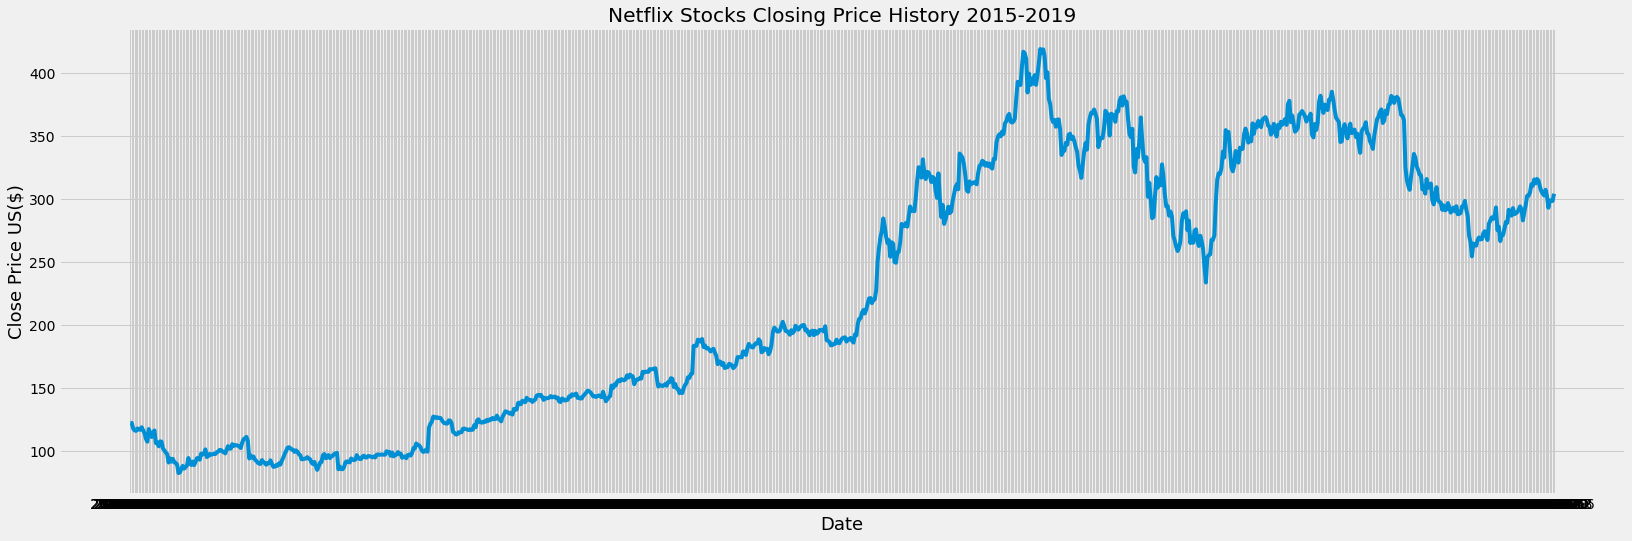

In [ ]:
##Visualizng date and close price
plt.figure(figsize=(25,8))
plt.title("Netflix Stocks Closing Price History 2015-2019")
plt.plot(nflx_df["Date"],nflx_df["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price US($)",fontsize=18)
plt.style.use("fivethirtyeight")
plt.show()

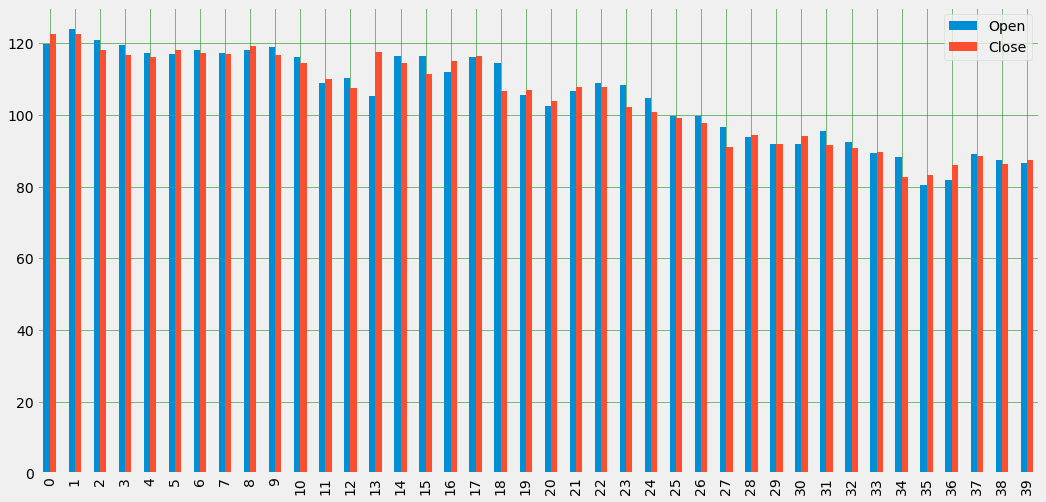

In [ ]:
#Plot Open vs Close
nflx_df[['Open','Close']].head(40).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

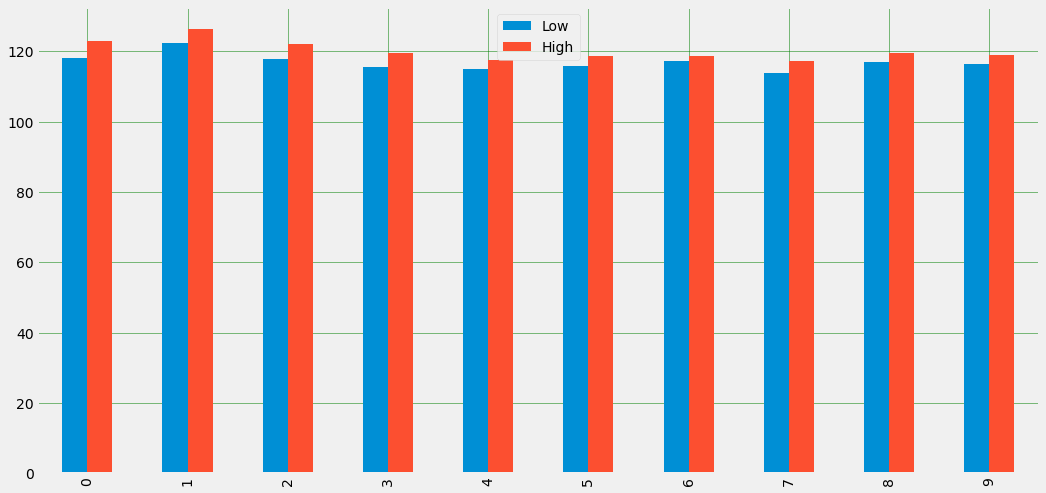

In [ ]:
#Plot Low vs High
nflx_df[['Low','High']].head(10).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) #Separating the date to date,month,year
#df['Month'] = df['Date'].dt.month


nflx_df['Year']=df['Date'].dt.year
nflx_df['Month']=df['Date'].dt.month
nflx_df['Day']=df['Date'].dt.day

nfx_df=nflx_df[['Day','Month','Year','High','Open','Low','Close']]
nfx_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Day,Month,Year,High,Open,Low,Close
0,16,12,2015,123.000000,119.800003,118.089996,122.639999
1,17,12,2015,126.349998,123.970001,122.419998,122.510002
2,18,12,2015,122.190002,120.849998,117.919998,118.019997
3,21,12,2015,119.589996,119.510002,115.660004,116.629997
4,22,12,2015,117.430000,117.300003,114.860001,116.239998
5,23,12,2015,118.559998,116.910004,115.779999,118.160004
6,24,12,2015,118.800003,118.220001,117.300003,117.330002
7,28,12,2015,117.349998,117.260002,113.849998,117.110001
8,29,12,2015,119.599998,118.190002,116.919998,119.120003
9,30,12,2015,119.019997,118.949997,116.430000,116.709999


In [ ]:
#separate independent and dependent variables
#Another method 

X = nfx_df.iloc[:,nfx_df.columns !='Close']


Y= nfx_df.iloc[:, 5]

In [ ]:
#Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [ ]:
#Linear Regression Model Training and Testing

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

y_pred=lr_model.predict(x_test)

In [ ]:
#Linear Model Cross-Validation

from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.9991114545648
